<a href="https://colab.research.google.com/github/WoradeeKongthong/raining_tomorrow_classification/blob/master/01_weather_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

%matplotlib inline

# Importing Data Set

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/WoradeeKongthong/raining_tomorrow_classification/master/weatherAUS.csv')

In [131]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [0]:
# drop RISK_MM column (Recommendation from data description in Kaggle)
df.drop(['RISK_MM'], axis = 1, inplace = True)

In [0]:
# Extract Year, Month, Day from Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# drop Date column
df.drop(['Date'], axis = 1, inplace = True)

In [135]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [136]:
print("summary of the data frame\n")
print(df.info())

summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cl

# **Categorical Features**

In [137]:
categorical_col = [x for x in df.columns if df[x].dtype == 'object']
print("# of categorical features : ", len(categorical_col))
print(categorical_col)

# of categorical features :  6
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [140]:
df[categorical_col].sample(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
116305,PerthAirport,W,NE,W,No,No
30907,Sydney,ESE,SE,E,No,Yes
59053,Bendigo,WSW,NaN,WSW,No,No
7130,Cobar,NNE,NNE,WNW,No,No
135693,AliceSprings,SE,E,SE,No,No


In [139]:
print('Unique values of each category')
df[categorical_col].nunique()

Unique values of each category


Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [146]:
print('values in each category')
for cat in categorical_col:
  print(cat,':\n', df[cat].unique())

values in each category
Location :
 ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir :
 ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am :
 ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm :
 ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday :
 ['No' 'Yes' nan]
RainTomorrow :
 ['No' 'Yes']


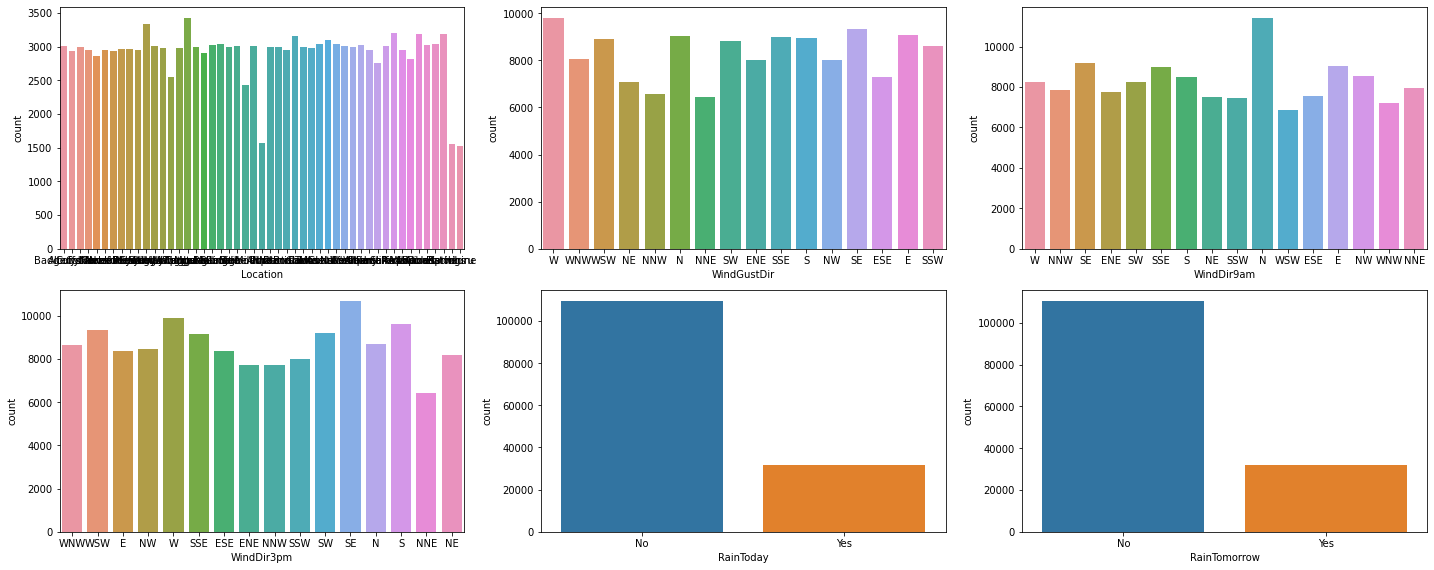

In [147]:
# categorical fetures frequency

rows = 2
columns = 3

index = 0

fig = plt.figure(figsize = (20,8))

for row in range(1,rows+1) :
  for column in range(1,columns+1) :
    fig.add_subplot(rows,columns,index+1)
    sns.countplot(df[categorical_col[index]])
    index +=1
    if index == len(categorical_col):
      break
fig.tight_layout(pad=1)
plt.show()

Note : RainTomorrow is the target value (y)

# Categorical Features : missing values

In [148]:
print('percentage of missing values in categorical columns\n')
print(round(df[categorical_col].isnull().sum()/len(df)*100,2))

percentage of missing values in categorical columns

Location        0.00
WindGustDir     6.56
WindDir9am      7.04
WindDir3pm      2.66
RainToday       0.99
RainTomorrow    0.00
dtype: float64


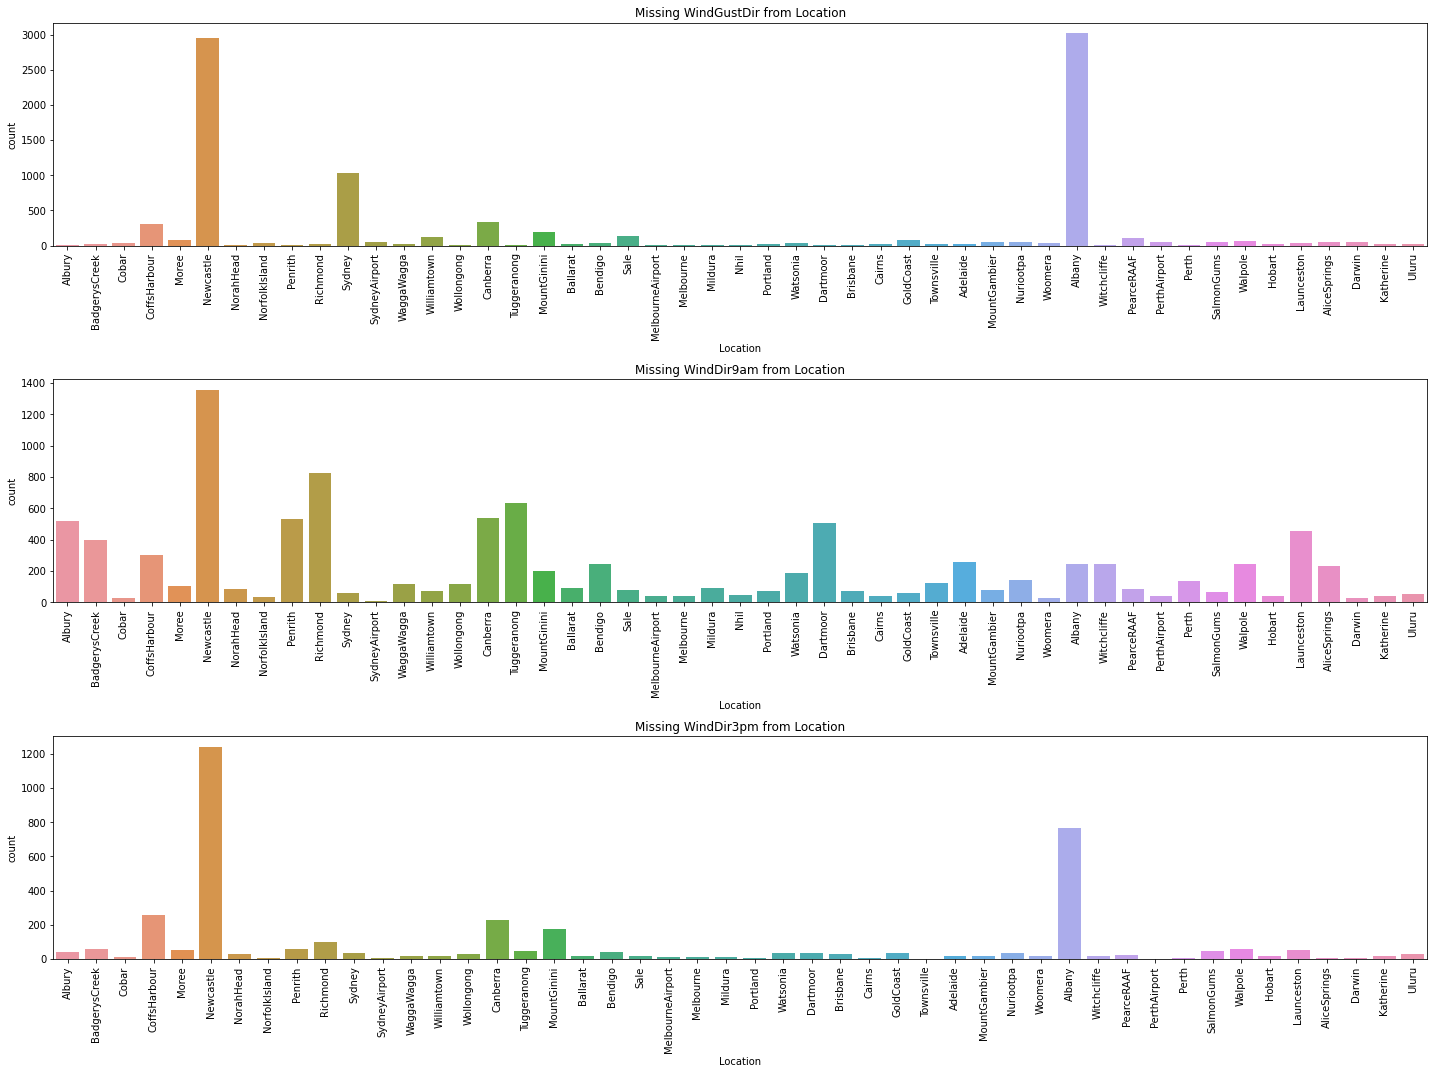

In [149]:
missing_cat = ['WindGustDir','WindDir9am','WindDir3pm']
index = 0

fig = plt.figure(figsize=(20,15))

for cat in missing_cat:
  fig.add_subplot(3,1,index+1)
  sns.countplot(data=df[df[cat].isnull()], x='Location')
  plt.xticks(rotation=90)
  plt.title('Missing {} from Location'.format(cat))
  index += 1


fig.tight_layout(pad=1)
plt.show()

Note : majority of missing values found in the weather stations in Newcastle and Albany

# **Numerical** **Features**

In [150]:
numerical_col = [x for x in df.columns if df[x].dtype != 'object']
print("# of numerical features : ", len(numerical_col))
print(numerical_col)

# of numerical features :  19
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [151]:
df[numerical_col].sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
12192,17.2,32.3,0.0,8.6,8.1,59.0,24.0,11.0,49.0,22.0,1023.5,1017.6,5.0,6.0,23.8,32.1,2009,11,9
94460,22.6,35.6,0.0,5.8,6.3,44.0,9.0,26.0,41.0,32.0,1020.4,1017.1,NaN,NaN,25.6,31.9,2010,3,18
37884,12.6,27.4,0.0,7.8,8.2,43.0,17.0,20.0,41.0,17.0,1013.8,1012.2,7.0,4.0,16.9,25.6,2014,11,5
42279,14.7,24.5,0.0,NaN,NaN,35.0,13.0,22.0,49.0,58.0,1022.0,1020.9,5.0,NaN,17.9,20.9,2011,8,3
135010,21.0,35.4,0.0,7.8,12.1,37.0,13.0,15.0,46.0,23.0,1014.1,1011.2,6.0,7.0,28.8,33.6,2014,12,19


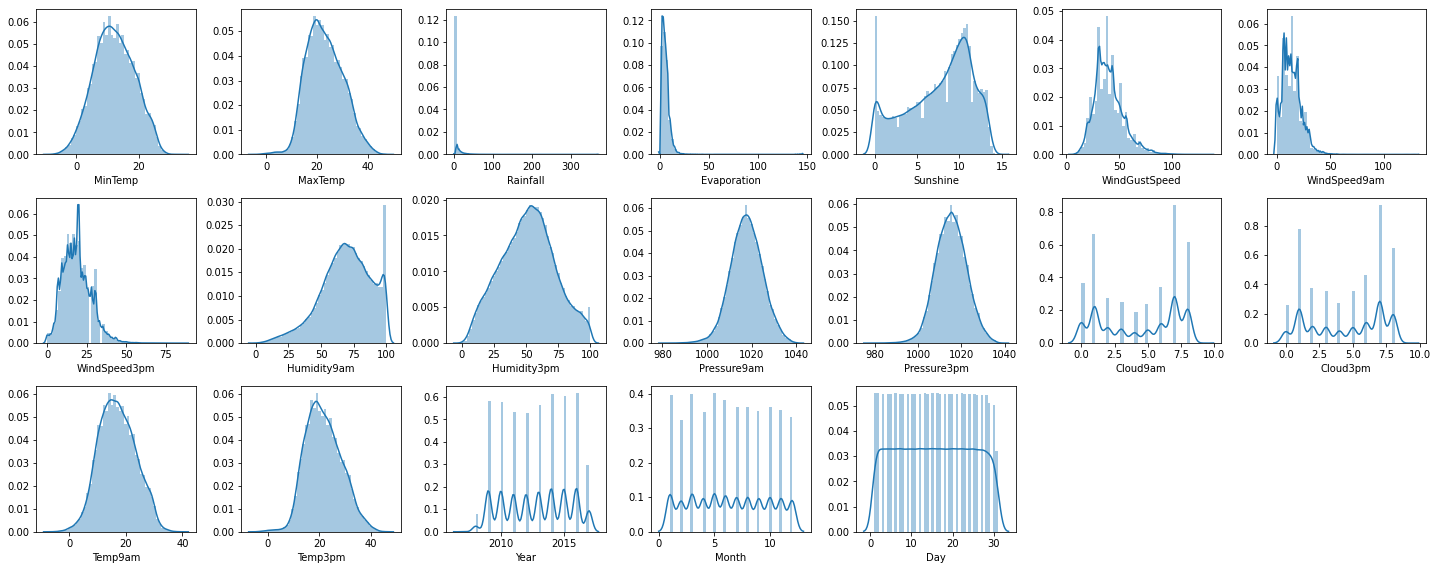

In [119]:
# Numerical Features distributions
rows = 3
columns = 7

index = 0

fig = plt.figure(figsize = (20,8))

for row in range(1,rows+1) :
  for column in range(1,columns+1) :
    fig.add_subplot(rows,columns,index+1)
    sns.distplot(df[numerical_col[index]])
    index +=1
    if index == len(numerical_col):
      break
fig.tight_layout(pad=1)
plt.show()

19 numerical features  
14 features are continuous values

# Numerical Features : missing values

In [120]:
print('percentage of missing values in numerical columns\n')
print(round(df[numerical_col].isnull().sum()/len(df)*100,2))

percentage of missing values in numerical columns

MinTemp           0.45
MaxTemp           0.23
Rainfall          0.99
Evaporation      42.79
Sunshine         47.69
WindGustSpeed     6.52
WindSpeed9am      0.95
WindSpeed3pm      1.85
Humidity9am       1.25
Humidity3pm       2.54
Pressure9am       9.86
Pressure3pm       9.83
Cloud9am         37.74
Cloud3pm         40.15
Temp9am           0.64
Temp3pm           1.92
Year              0.00
Month             0.00
Day               0.00
dtype: float64


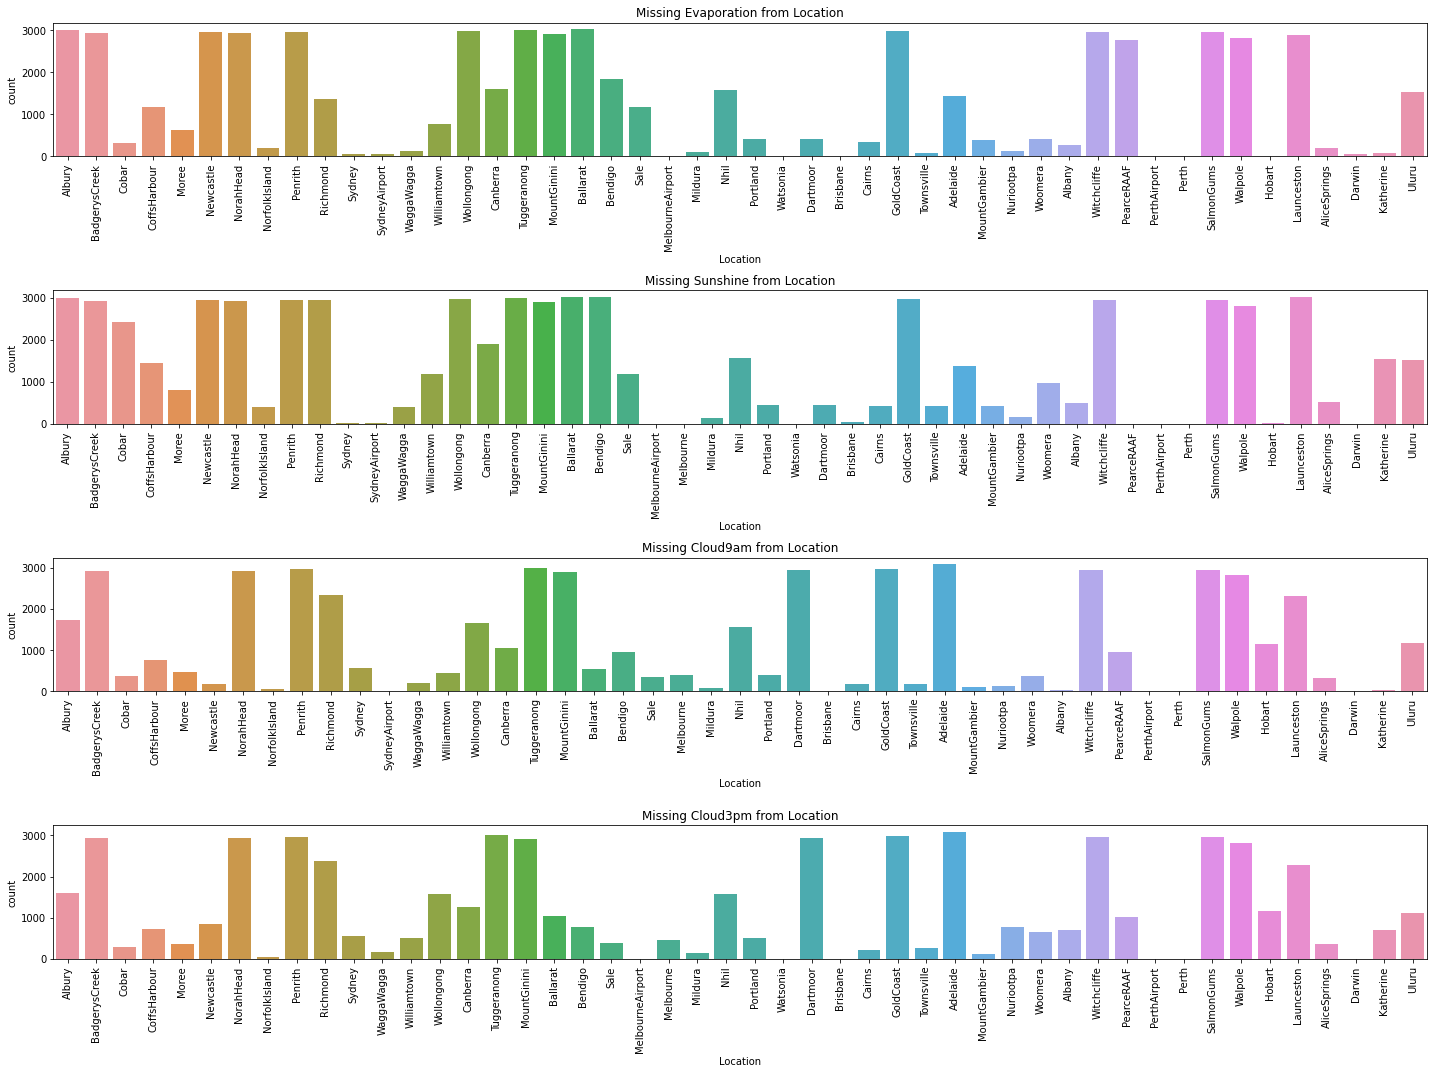

In [127]:
missing_num = ['Evaporation','Sunshine','Cloud9am','Cloud3pm']
index = 0

fig = plt.figure(figsize=(20,15))

for num in missing_num:
  fig.add_subplot(4,1,index+1)
  sns.countplot(data=df[df[num].isnull()], x='Location')
  plt.xticks(rotation=90)
  plt.title('Missing {} from Location'.format(num))
  index += 1


fig.tight_layout(pad=1)
plt.show()

# Numerical Features : outliers

In [128]:
df[numerical_col].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Rainfall, Evaporation, WindGustSpeed, WindSpeed9am and WindSpeed3pm may contain outliers

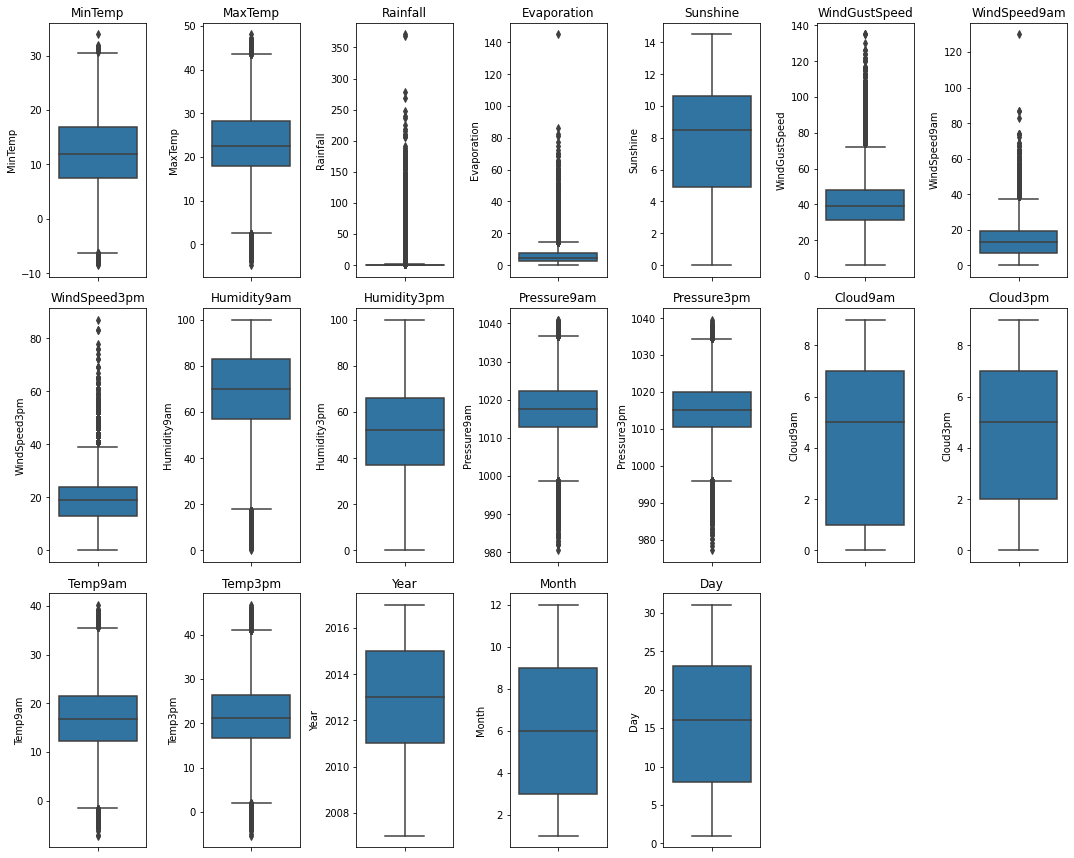

In [125]:
# check outliers with boxplot
rows = 3
columns = 7

index = 0

fig = plt.figure(figsize = (15,12))

for row in range(1,rows+1) :
  for column in range(1,columns+1) :
    fig.add_subplot(rows,columns,index+1)
    sns.boxplot(y = df[numerical_col[index]])
    plt.title(numerical_col[index])
    index +=1
    if index == len(numerical_col):
      break

fig.tight_layout(pad=1)
plt.show()

In [0]:
# check number and percentage of outliers

num_outliers = []
percent_outliers = []

for col in numerical_col :
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  notnull = len(df)-df[col].isnull().sum()

  num_out = (df[col] < (Q1 - IQR*1.5)).sum()+(df[col] > (Q3 + IQR*1.5)).sum()
  perc_out = round(num_out/notnull*100, 3)

  num_outliers.append(num_out)
  percent_outliers.append(str(perc_out)+'%')

In [0]:
outlier_df = pd.DataFrame(data=[numerical_col,num_outliers,percent_outliers],
                          index=['feature','outliers','percentage'])
outlier_df = outlier_df.T

In [168]:
outlier_df

,feature,outliers,percentage
0,MinTemp,62,0.044%
1,MaxTemp,459,0.324%
2,Rainfall,25228,17.919%
3,Evaporation,1954,2.402%
4,Sunshine,0,0.0%
5,WindGustSpeed,3006,2.261%
6,WindSpeed9am,1739,1.235%
7,WindSpeed3pm,2458,1.761%
8,Humidity9am,1419,1.011%
9,Humidity3pm,0,0.0%


# Correlation in numerical features

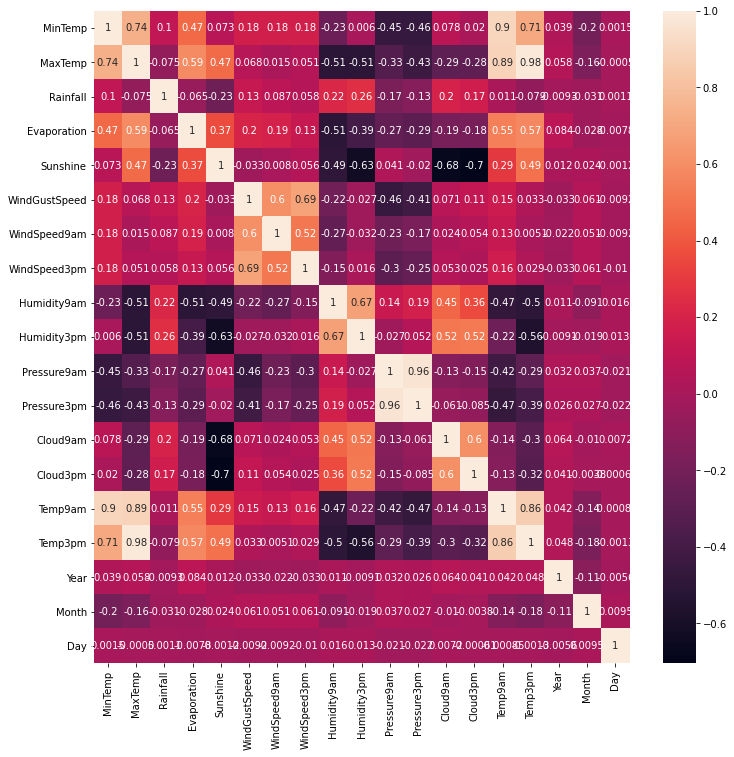

In [179]:
corrmat = df.corr()

fig = plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True)
plt.show()

In [0]:
col_to_pair = ['MinTemp','MaxTemp','Temp9am','Temp3pm','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Evaporation','Sunshine']

<Figure size 1800x1800 with 0 Axes>

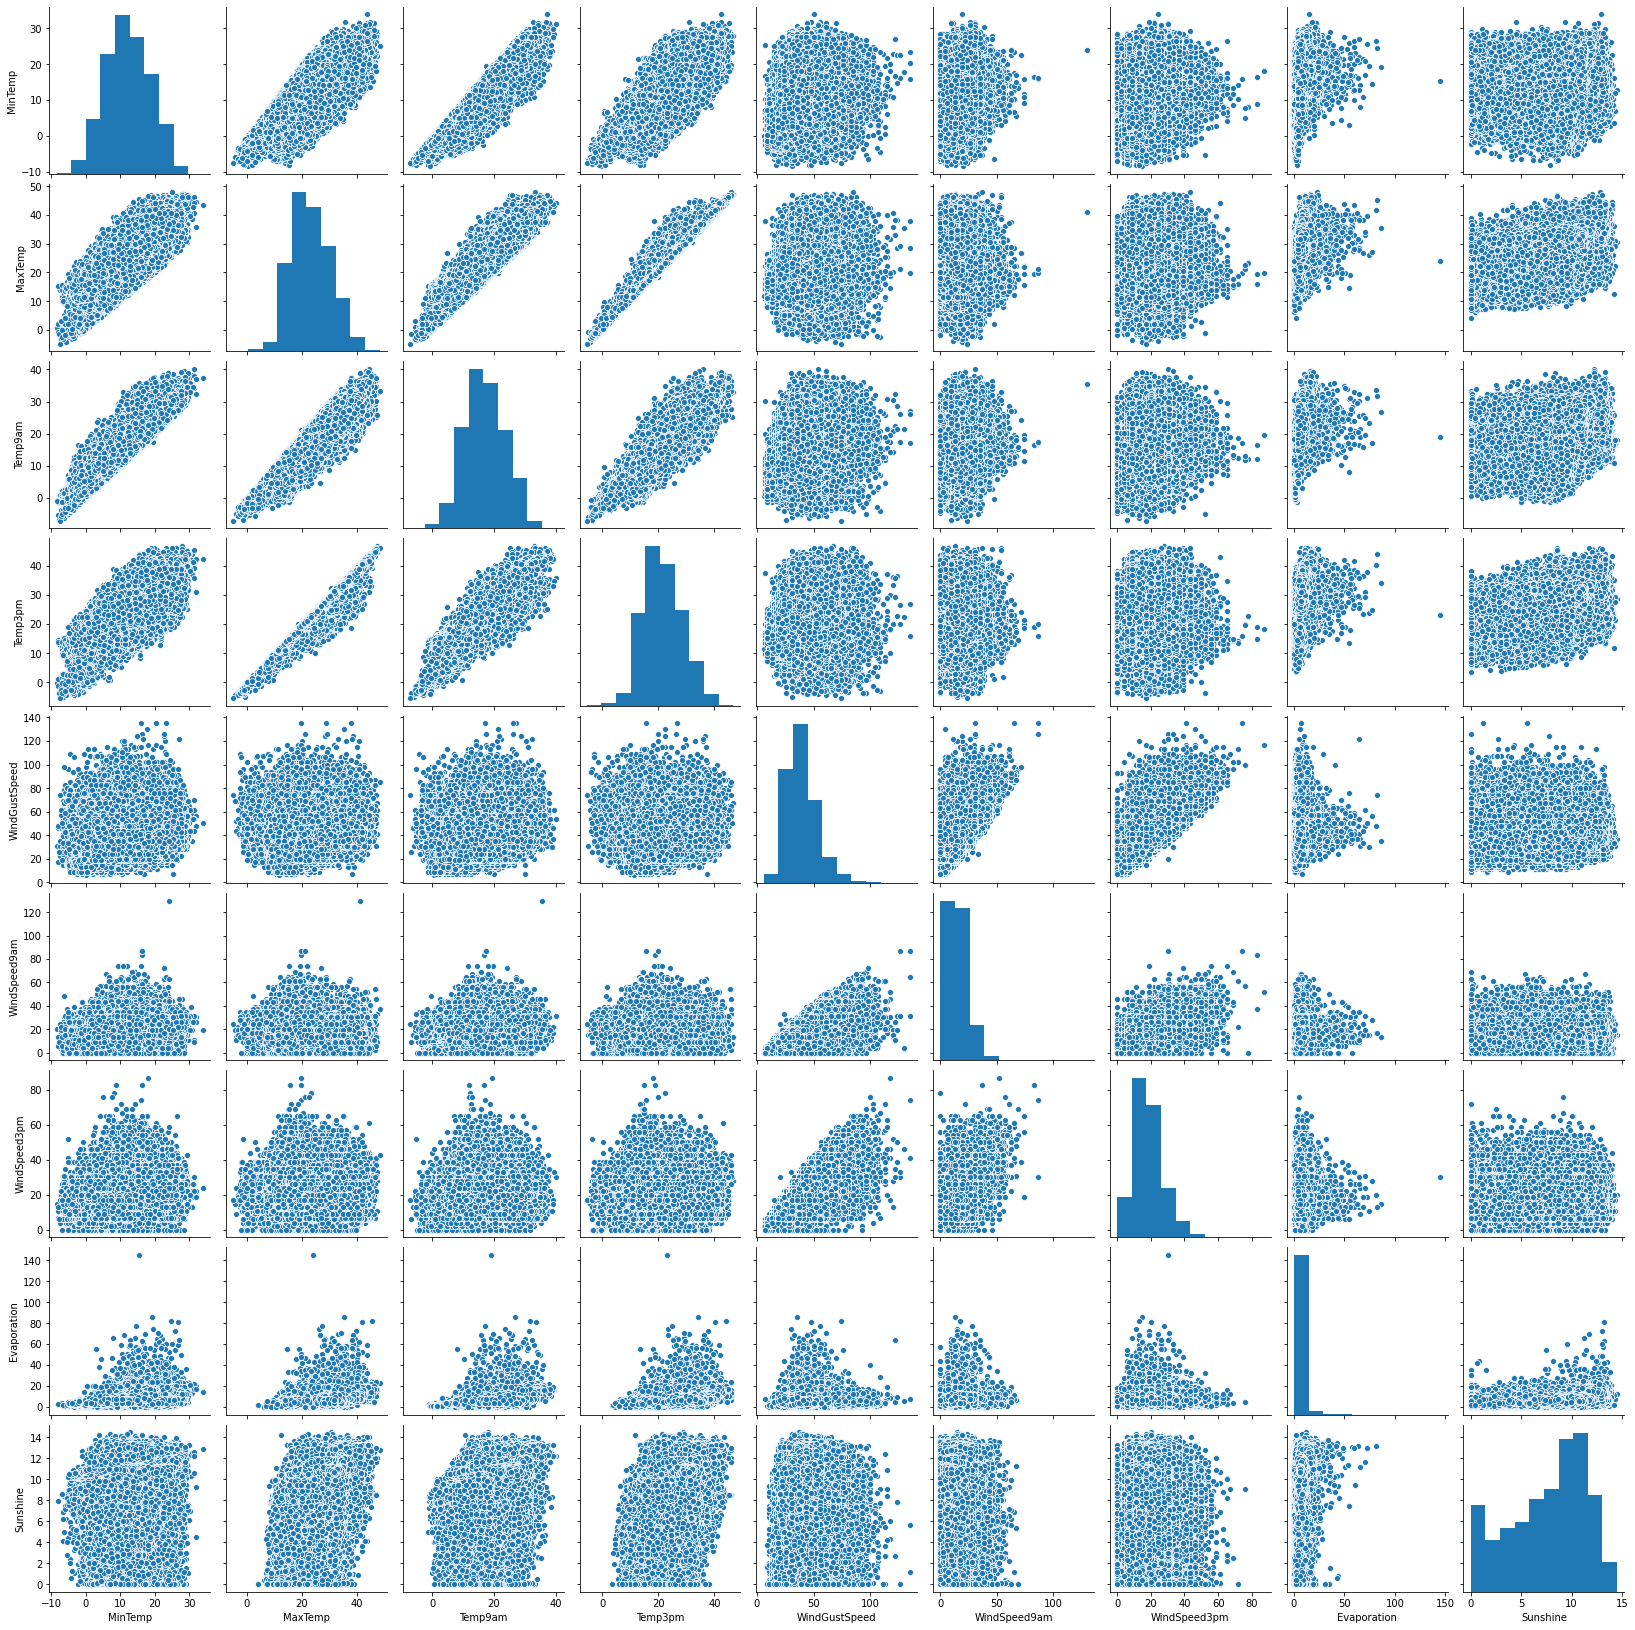

In [153]:
sns.pairplot(df[col_to_pair])
plt.show()

MinTemp, MaxTemp, Temp9am and Temp3pm are highly correlated

# Multivariate Analysis

In [154]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

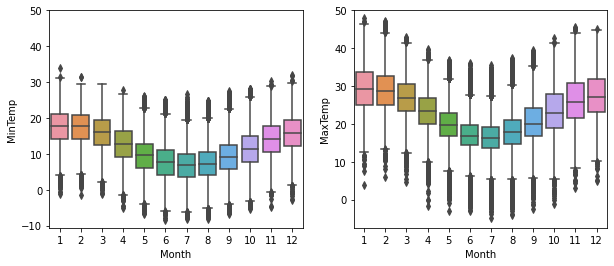

In [168]:
# Temperatures in month
fig = plt.figure(figsize=(10,4))

fig.add_subplot(121)
sns.boxplot(data=df, x='Month', y='MinTemp')
plt.ylim(top=50)

fig.add_subplot(122)
sns.boxplot(data=df, x='Month', y='MaxTemp')
plt.ylim(top=50)

plt.show()

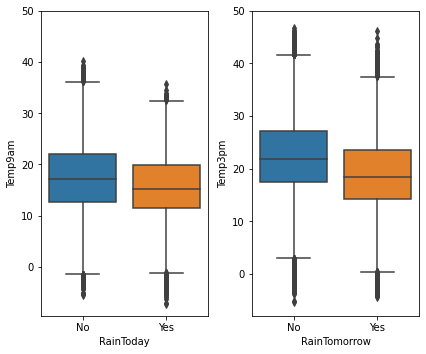

In [198]:
# Temperature before Raining
fig = plt.figure(figsize=(6,5))

fig.add_subplot(121)
sns.boxplot(data=df, x='RainToday', y='Temp9am')
plt.ylim(top=50)

fig.add_subplot(122)
sns.boxplot(data=df, x='RainTomorrow', y='Temp3pm')
plt.ylim(top=50)

fig.tight_layout(pad=1)
plt.show()

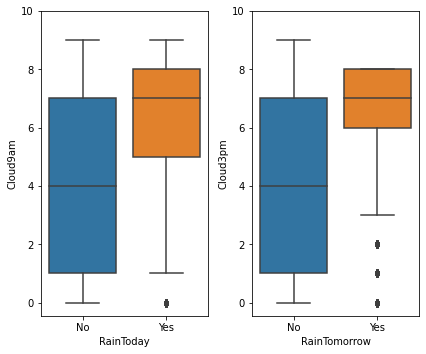

In [199]:
# Cloud before Raining
fig = plt.figure(figsize=(6,5))

fig.add_subplot(121)
sns.boxplot(data=df, x='RainToday', y='Cloud9am')
plt.ylim(top=10)

fig.add_subplot(122)
sns.boxplot(data=df, x='RainTomorrow', y='Cloud3pm')
plt.ylim(top=10)

fig.tight_layout(pad=1)
plt.show()

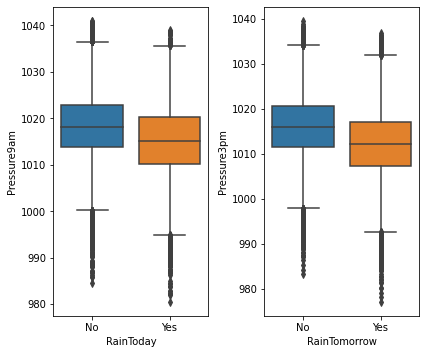

In [214]:
# Pressure before Raining
fig = plt.figure(figsize=(6,5))

fig.add_subplot(121)
sns.boxplot(data=df, x='RainToday', y='Pressure9am')
#plt.ylim(top=10)

fig.add_subplot(122)
sns.boxplot(data=df, x='RainTomorrow', y='Pressure3pm')
#plt.ylim(top=10)

fig.tight_layout(pad=1)
plt.show()

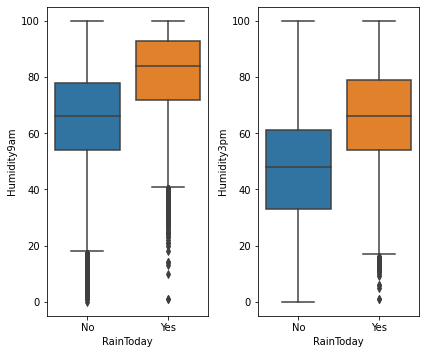

In [208]:
# Humidity in Rainy Days
fig = plt.figure(figsize=(6,5))

fig.add_subplot(121)
sns.boxplot(data=df, x='RainToday', y='Humidity9am')
#plt.ylim(top=60)

fig.add_subplot(122)
sns.boxplot(data=df, x='RainToday', y='Humidity3pm')
#plt.ylim(top=60)

fig.tight_layout(pad=1)
plt.show()

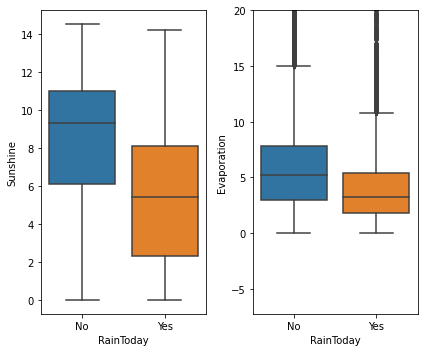

In [229]:
# Sunshine and Evaporation in Rainy Days
fig = plt.figure(figsize=(6,5))

fig.add_subplot(121)
sns.boxplot(data=df, x='RainToday', y='Sunshine')


fig.add_subplot(122)
sns.boxplot(data=df, x='RainToday', y='Evaporation')
plt.ylim(top=20)

fig.tight_layout()
plt.show()